<a href="https://colab.research.google.com/github/HafizAQ/DL_Practices/blob/main/ANN_MNIST_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Courtesy: https://ai.gopubby.com/step-by-step-guide-to-building-an-artificial-neural-network-and-observing-how-overfitting-occurs-84961f96c7e8

#Artificial Neural Network (ANN)

-> ANN with MNIST(Dataset), and CNN Architecture


In [1]:
#i) # calling important Library
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#ii) # calling the dataset
from tensorflow.keras.datasets import mnist

# Access the training and testing data
(X_train, y_train) , (X_test, y_test) = mnist.load_data()

(X_train.shape, y_train.shape) , (X_test.shape, y_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


(((60000, 28, 28), (60000,)), ((10000, 28, 28), (10000,)))

In [3]:
#iii) Data-preprocessing

# Preprocess the data
X_train = X_train.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))

In [4]:
#iv) # Convert data to float32
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)

# Calculate mean and standard deviation of the training data
mean = np.mean(X_train) # Mean
std = np.std(X_train) # Variance

# Apply Z-score normalization to the training data
X_train_normalized = (X_train - mean) / std

# Apply Z-score normalization to the test data using the mean and standard deviation of the training data
X_test_normalized = (X_test - mean) / std

# Display the dimensions of the standardized data
print("Dimensions of X_train: ", X_train_normalized.shape)
print("Dimensions of X_test: ", X_test_normalized.shape)

Dimensions of X_train:  (60000, 28, 28, 1)
Dimensions of X_test:  (10000, 28, 28, 1)


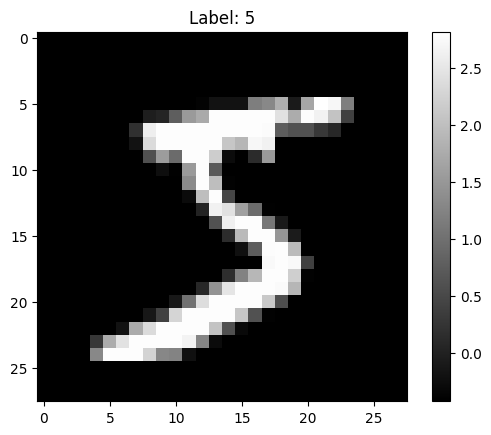

In [5]:
#v) Visualizing the data
import matplotlib.pyplot as plt

# Display an image from the data along with its label
index = 0 # Index of the image to display
plt.imshow(X_train_normalized[index], cmap='gray')  # Display the image
plt.colorbar()  # Display the color bar
plt.title(f'Label: {y_train[index]}')  # Title with the label
plt.show()  # Show the image

In [6]:
#vi) Decision Making
# 1. calling important Library
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout # Changed Dropout0 to Dropout

In [7]:
#Dropping out is the simple way to prevent NN overfitting
#ANN model Architecture Design

# 2. Create the model
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25)) #dropout layer to reduce overfitting
model.add(Dense(10, activation='softmax'))

# Display model summary
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
#3. Compiling model
# Importing necessary libraries for compiling the model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy

# Compiling the model with SparseCategoricalCrossentropy loss function and Adam optimizer
model.compile(loss=SparseCategoricalCrossentropy(),
              optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [10]:
#Training Phase
#4.Fit the model (without specific hyper-paramter tuning method such as batch normalization, early stopping or L2 regularization)
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8331 - loss: 0.8335 - val_accuracy: 0.9715 - val_loss: 0.0953
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9729 - loss: 0.0928 - val_accuracy: 0.9790 - val_loss: 0.0661
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9808 - loss: 0.0681 - val_accuracy: 0.9867 - val_loss: 0.0521
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9837 - loss: 0.0560 - val_accuracy: 0.9854 - val_loss: 0.0526
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9868 - loss: 0.0445 - val_accuracy: 0.9862 - val_loss: 0.0562
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9880 - loss: 0.0400 - val_accuracy: 0.9854 - val_loss: 0.0563
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9886 - loss: 0.0403 - val_accuracy: 0.9868 - val_loss: 0.0530
Epoch 8/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9921 - loss: 0.0265 -

In [11]:
#5. Test Phase (model.evaluation)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9845 - loss: 0.2173
Test accuracy: 0.9872999787330627


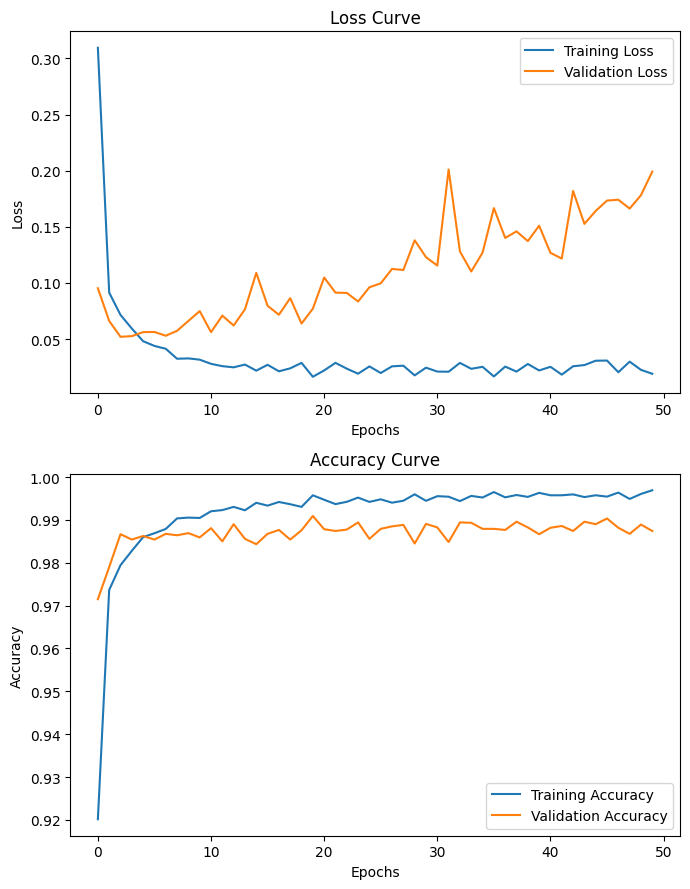

In [12]:
#6. Results Visualization

import matplotlib.pyplot as plt

# Create subplots with smaller figure size
fig, axs = plt.subplots(2, 1, figsize=(7, 9))

# Plotting the loss curve
axs[0].plot(history.history['loss'], label='Training Loss')
axs[0].plot(history.history['val_loss'], label='Validation Loss')
axs[0].set_title('Loss Curve')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend()

# Plotting the accuracy curve
axs[1].plot(history.history['accuracy'], label='Training Accuracy')
axs[1].plot(history.history['val_accuracy'], label='Validation Accuracy')
axs[1].set_title('Accuracy Curve')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].legend()

plt.tight_layout()
plt.show()

In [13]:
#7: Problems stem from Overfitting (Early Stopping, Dropout, batch_size, learning_rate, L2 regularization with different values)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.regularizers import l2

# Create the model
model = Sequential()

# Convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(0.01), input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))  # Max pooling layer

# Adding Batch Normalization layer with momentum and epsilon settings
model.add(BatchNormalization(momentum=0.9, epsilon=1e-5))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.01)))  # Convolutional layer
model.add(MaxPooling2D((2, 2)))  # Max pooling layer
model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.01)))  # Convolutional layer
model.add(Flatten())  # Flatten layer to convert 2D matrix to a vector

# Fully connected layers
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))  # Dense (fully connected) layer
model.add(Dropout(0.30))  # Dropout layer for regularization
model.add(Dense(10, activation='softmax'))  # Output layer with softmax activation for classification

# Display model summary
model.summary()  # Print model architecture and parameters


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 13, 13, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,450 (365.04 KB)

 Trainable params: 93,386 (364.79 KB)

 Non-trainable params: 64 (256.00 B)

In [19]:
#7: Problems stem from Overfitting (Early Stopping, Dropout, batch_size, learning_rate, L2 regularization with different values)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.regularizers import l2

# Create the model
model = Sequential()

# Convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(0.01), input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))  # Max pooling layer

# Adding Batch Normalization layer with momentum and epsilon settings
model.add(BatchNormalization(momentum=0.9, epsilon=1e-5))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.01)))  # Convolutional layer
model.add(MaxPooling2D((2, 2)))  # Max pooling layer
model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.01)))  # Convolutional layer
model.add(Flatten())  # Flatten layer to convert 2D matrix to a vector

# Fully connected layers
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))  # Dense (fully connected) layer
model.add(Dropout(0.30))  # Dropout layer for regularization
model.add(Dense(10, activation='softmax'))  # Output layer with softmax activation for classification

# Display model summary
model.summary()  # Print model architecture and parameters

# Compile the model
# Specifying the optimizer, loss function, and metrics
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 13, 13, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,450 (365.04 KB)

 Trainable params: 93,386 (364.79 KB)

 Non-trainable params: 64 (256.00 B)

In [20]:
# Fit the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2 , callbacks=[es])

Epoch 1/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8783 - loss: 1.3048 - val_accuracy: 0.9678 - val_loss: 0.2724
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9664 - loss: 0.2744 - val_accuracy: 0.9810 - val_loss: 0.2137
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9704 - loss: 0.2375 - val_accuracy: 0.9780 - val_loss: 0.1906
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9722 - loss: 0.2136 - val_accuracy: 0.9794 - val_loss: 0.1793
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9754 - loss: 0.2000 - val_accuracy: 0.9727 - val_loss: 0.1913
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9747 - loss: 0.1867 - val_accuracy: 0.9817 - val_loss: 0.1618
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9774 - loss: 0.1777 - val_accuracy: 0.9817 - val_loss: 0.1591
Epoch 8/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9782 - loss: 0.1733 

In [21]:
#8: Final Test
# Define the path to save the model
model_path = "/content/trained_model.h5"

# Save the trained model
model.save(model_path)

print("Model saved at:", model_path)

Model saved at: /content/trained_model.h5


In [22]:
# Load the trained model
New_model = tf.keras.models.load_model("/content/trained_model.h5")

In [23]:
predictions = New_model.predict([X_test])
print(predictions)

print(np.argmax(predictions[1]))

plt.imshow(X_test[1])
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
[[7.2954300e-08 4.2830770e-06 1.6389576e-04 ... 9.9979693e-01
  4.2215891e-07 2.8941184e-05]
 [8.6500676e-04 1.7388561e-04 9.9893743e-01 ... 1.3173943e-06
  1.5168850e-05 4.4320064e-08]
 [9.8345035e-06 9.9951553e-01 1.8306931e-05 ... 2.4336278e-04
  5.7679168e-05 1.5346935e-05]
 ...
 [2.9655482e-07 1.6739529e-04 2.4512813e-06 ... 4.5995661e-05
  2.6771220e-05 4.2753447e-05]
 [2.1583826e-06 3.4372708e-06 2.3538693e-08 ... 4.7485230e-07
  8.3528954e-05 7.0057758e-06]
 [2.4856563e-04 2.7136488e-07 7.6050051e-06 ... 1.8876709e-09
  3.6702826e-05 2.7561148e-07]]
